In [1]:
import platform
import os
import numpy as np
import tensorflow as tf
gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64': 
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.vector_gen import *
from Utils.w2b_encoding_lw_iter1 import *
from Utils.w2b_encoding_lw_iter2 import *
from Utils.w2b_encoding_lw_iter3 import *
from Utils.w2b_encoding_lw_iter4 import *
from Models.RNN_paper_prototype import *
from Utils.metrics_summary import *

2024-04-17 02:21:04.860691: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 02:21:04.860735: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 02:21:04.861805: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-17 02:21:04.867232: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 02:21:05.535014: W tensorflow/compiler/tf2

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-04-17 02:21:06.182792: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-17 02:21:06.218671: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-17 02:21:06.218853: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
encoders = [encoder1, encoder2, encoder3, encoder4]
models = [model_ver_0, model_ver_5, model_ver_6]
res_dict = {} #(model, encoder) : [hist, pred]

In [5]:
original_df = dataframe_init(gpu_token)[0]
vectors = vec_split(original_df)
for model in models:
    for encoder in encoders:
        vectors = encoder(vectors)
        tensors = tensor_gen(vectors)
        # Model Training and Prediction
        curr_model = model(tensors[0][0].shape[0])
        history = curr_model.fit(tensors[0], tensors[3], epochs=50, validation_data=(tensors[1],tensors[4]))
        y_pred = curr_model.predict(tensors[2])
        res_dict[(curr_model, encoder)] = [history, y_pred]

/home/ucdasec/Faulthunter-RNN-approach/Utils/w2b_encoding_lw_iter4.py:103: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  vectors[vector]['Encoded Lines'][row[0]] = [eval(i) for i in encodedline]#tuple(encodedline)
/home/ucdasec/Faulthunter-R

00000000000000000000000000000000
00000000000000000000000000000000
10000000000000000000000000000000
00000000000000000000000000000000
10000000000000000000000000000000
10000000000000000000000000000000
10000000000000000000000000000000
00000000000000000000000000000000
10000000000000000000000000000000
10000000000000000000000000000000
10000000000000000000000000000000
10000000000000000000000000000000
10000000000000000000000000000000
10000000000000000000000000000000
10000000000000000000000000000000
01000000000000000000000000000000
10000000000000000000000000000000
01000000000000000000000000000000
10000000000000000000000000000000
01000000000000000000000000000000
10000000000000000000000000000000
01000000000000000000000000000000
00000000000000000000000000000000
10000000000000000000000000000000
00000000000000000000000000000000
10000000000000000000000000000000
10000000000000000000000000000000
10000000000000000000000000000000
10000000000000000000000000000000
10000000000000000000000000000000
1000000000

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 1/50


2024-04-17 02:21:52.881498: I external/local_xla/xla/service/service.cc:168] XLA service 0x61e48c8e6ba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-17 02:21:52.881536: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-04-17 02:21:52.886940: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-17 02:21:53.350863: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1713334913.423016   26569 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


90/90 [==============================] - 1s 3ms/step - loss: 0.5876 - accuracy: 0.9762 - val_loss: 0.4951 - val_accuracy: 0.9755
Epoch 2/50
90/90 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.9762 - val_loss: 0.3468 - val_accuracy: 0.9755
Epoch 3/50
90/90 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.9762 - val_loss: 0.2498 - val_accuracy: 0.9755
Epoch 4/50
90/90 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9762 - val_loss: 0.1904 - val_accuracy: 0.9755
Epoch 5/50
90/90 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9762 - val_loss: 0.1543 - val_accuracy: 0.9755
Epoch 6/50
90/90 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9762 - val_loss: 0.1314 - val_accuracy: 0.9755
Epoch 7/50
90/90 [==============================] - 0s 2ms/step - loss: 0.1112 - accuracy: 0.9765 - val_loss: 0.1153 - val_accuracy: 0.9755
Epoch 8/50
90/90 [=============

In [6]:
def results(y_pred, tensors, history):
    classify = lambda x : int(x[0]<x[1])
    classified_outputs = list(map(classify, y_pred))
    classified_labels = list(map(classify, tensors[3]))
    score_summary(classified_labels, classified_outputs, 0)
    true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 0)
    print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))
    print('#########################################\n')
    score_summary(classified_labels, classified_outputs, 1)
    true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 1)
    print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))

    import matplotlib.pyplot as plt
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

For secure:
f1 score:  0.9869646182495344
precision score:  0.9802712700369913
recall score:  0.99375

true_positives: 795
true_negetives: 0
false_positives: 16
false_negetives: 5

#########################################

For insecure:
f1 score:  0.0
precision score:  0.0
recall score:  0.0

true_positives: 0
true_negetives: 795
false_positives: 5
false_negetives: 16



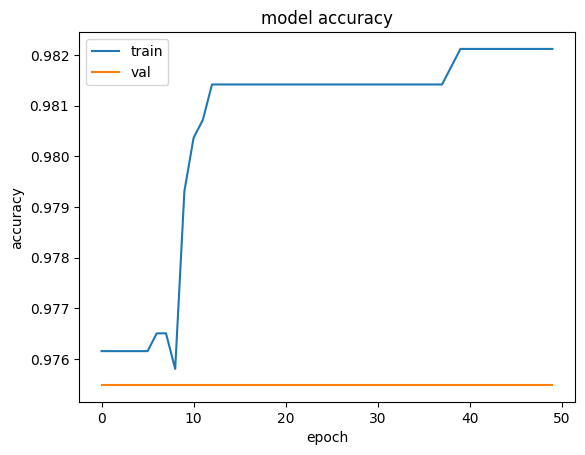

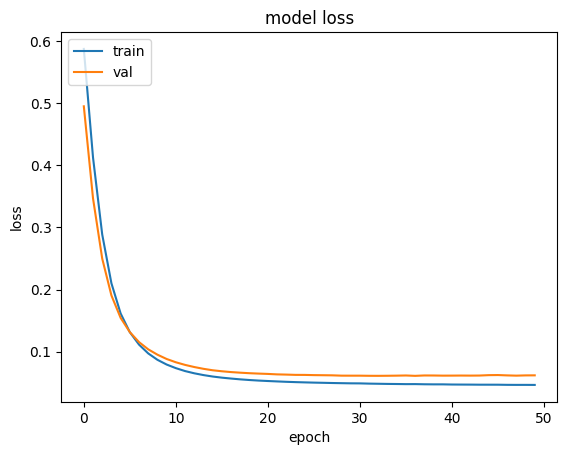

In [7]:
results(y_pred, tensors, history)

In [6]:
!nvidia-smi

Wed Apr 17 02:20:47 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 27%   35C    P2    29W / 151W |    376MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
!kill 26192

: 

: 